<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [28]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [29]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Data Cleaning: 
<p>Clean the data by removing inconsistencies, errors, and unnecessary variables

In [14]:
boston_df=boston_df.drop(columns=['Unnamed: 0'])

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Summary Statistics: 
<p>Calculate measures of central tendency (mean, median, mode) and dispersion (standard deviation, range, interquartile range) for numerical variables.

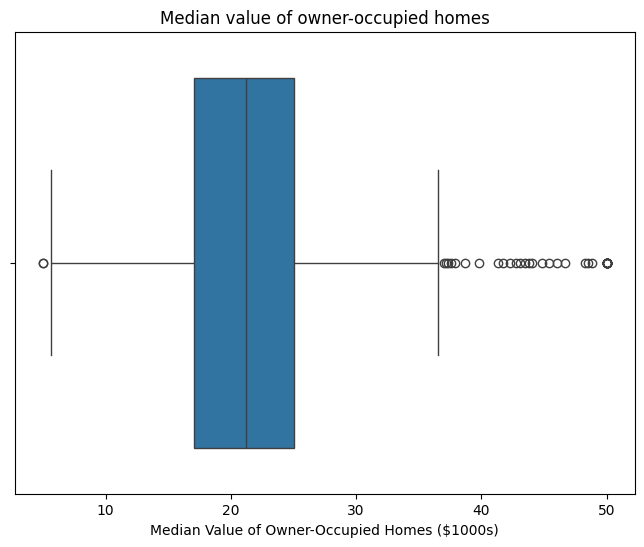

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

#### 2. Bar Plot for Charles River Variable (CHAS)

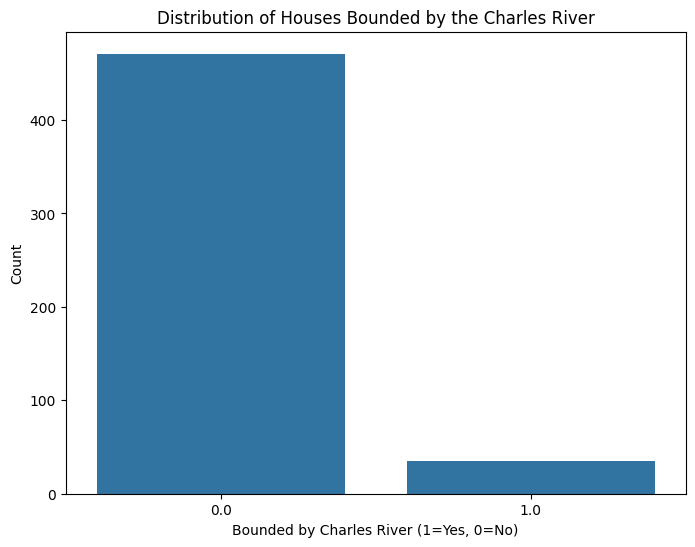

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Distribution of Houses Bounded by the Charles River')
plt.xlabel('Bounded by Charles River (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

#### 3. Boxplot for MEDV vs. Age Groups
<P>Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

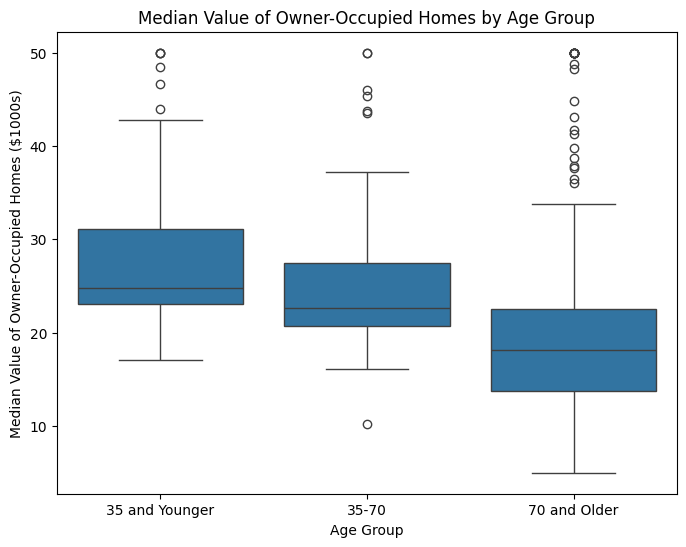

In [25]:
# Create age groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '35-70', '70 and Older'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

#### 4. Scatter Plot for Nitric Oxide vs. Non-Retail Business Acres
<P>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

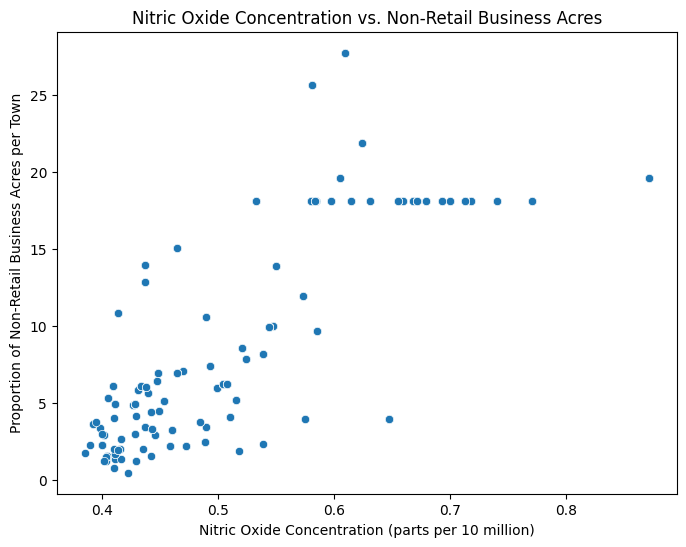

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Nitric Oxide Concentration vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

#### 5. Histogram for Pupil-Teacher Ratio
<P>Create a histogram for the pupil to teacher ratio variable

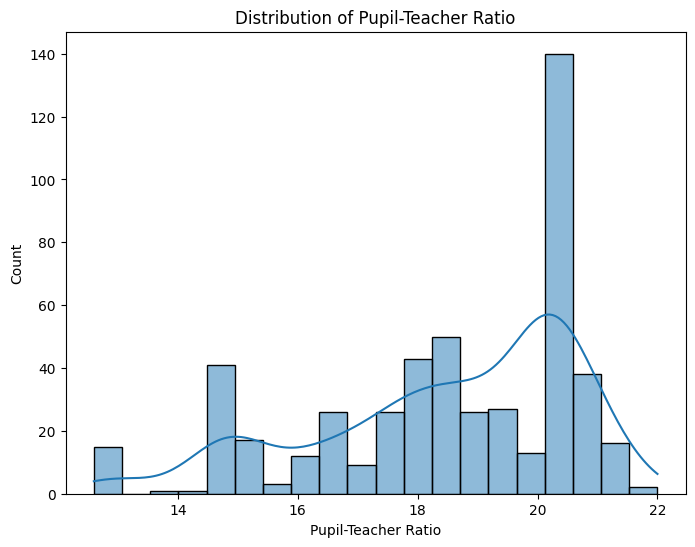

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Count')
plt.show()

##### Interpretation:
<p>The histogram shows the distribution of pupil-teacher ratios. The distribution appears to be roughly normal, with most values concentrated around the mean.

In [62]:
import scipy.stats as stats
import statsmodels.formula.api as smf

In [45]:
house_bounded_set = boston_df[boston_df['CHAS'] == 1]['MEDV']
house_not_bounded_set = boston_df[boston_df['CHAS'] == 0]['MEDV'] 

In [ ]:
# Conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(house_bounded_set, house_not_bounded_set)

# Set alpha level and determine significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("There is no significant difference in median value of houses bounded by the Charles river.")


There is a significant difference in median value of houses bounded by the Charles river.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [71]:
# Create age groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '35-70', '70 and Older'])


boston_df['Age_Group']

# Perform the one-way ANOVA test
result = smf.ols('MEDV ~ Age_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(result, typ=1)
print(anova_table)

alpha = 0.05

# Interpret the result
if anova_table['PR(>F)'].iloc[0] < alpha:
    print("There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
else:
    print("There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")

              df        sum_sq      mean_sq         F        PR(>F)
Age_Group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN
There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)


#### Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [76]:
# Calculate Pearson correlation coefficient
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr_coef:.2f}, p-value: {p_value:.4f}")

# Set alpha level and determine significance
alpha = 0.05
if p_value < alpha:
    print("There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)")
else:
    print("There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)")

Pearson correlation coefficient: 0.76, p-value: 0.0000
There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


#### The impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [77]:
# Fit a linear regression model
model = smf.ols('MEDV ~ DIS', data=boston_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        22:10:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

#### (Optional): Load in the Dataset in your Jupyter Notebook
<p>Boston housing dataset in the notebook:

In [80]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)